# Download the high-resolution Greenland NGRIP icecore d18O (temperature) data for DO events of the last glacial period (10 to 120 kyr)

REFERENCES

The dating of the 0-7.9 ka b2k part is described in the paper:
B.M. Vinther, H.B. Clausen, S.J. Johnsen, S.O. Rasmussen, K.K. Andersen, S.L. Buchardt, 
D. Dahl-Jensen, I.K. Seierstad, M.-L. Siggaard-Andersen, J.P. Steffensen, A.M. Svensson, 
J. Olsen, and J. Heinemeier
A synchronized dating of three Greenland ice cores throughout the Holocene
Journ. Geophys. Res., vol. 111, D13102, 2006, doi:10.1029/2005JD006921

The dating of the 7.9-14.7 ka b2k part and the concept of the MCE is described in the paper:
S.O. Rasmussen, K.K. Andersen, A.M. Svensson, J.P. Steffensen, B.M. Vinther, H.B. Clausen, 
M.-L. Siggaard-Andersen, S.J. Johnsen, L.B. Larsen, D. Dahl-Jensen, M. Bigler, R. Röthlisberger, 
H. Fischer, K. Goto-Azuma, M.E. Hansson, and U. Ruth
A new Greenland ice core chronology for the last glacial termination
Journ. Geophys. Res., vol. 111, D06102, 2006, doi:10.1029/2005JD006079

The dating of the 14.7-41.8 ka b2k part and the ss09sea06bm is described in the paper:
K.K. Andersen, A. Svensson, S.J. Johnsen, S.O. Rasmussen, M. Bigler, R. Röthlisberger, U. Ruth,
M.-L. Siggaard-Andersen, J.P. Steffensen, D. Dahl-Jensen, B.M. Vinther, and H.B. Clausen
The Greenland Ice Core Chronology 2005, 15-42 ka. Part 1: Constructing the time scale
Quaternary Science Reviews, vol. 25, Shackleton special issue 24, 2006

The dating of the 41.8-60.0 ka b2k part is described in the paper:
A. Svensson, K.K. Andersen, M. Bigler, H.B. Clausen, D. Dahl-Jensen, S.M. Davies, S.J. Johnsen,
R. Muscheler, S.O. Rasmussen, R. Röthlisberger, I. Seierstad, J.P. Steffensen, and B.M. Vinther
A 60,000 year Greenland stratigraphic ice core chronology
Submitted to Climate of the Past, October 2007

In [103]:
# download the data from the web
import requests

url = 'https://www.iceandclimate.nbi.ku.dk/data/2010-11-19_GICC05modelext_for_NGRIP.txt'

response = requests.get(url)

# create a folder in the current directory to store the data if it does not exist
import os
if not os.path.exists('original_data'):
    os.makedirs('original_data')


# write the content of the server response to a local file
with open('original_data/GICC05modelext_for_NGRIP.txt', 'wb') as f:
    f.write(response.content)



In [107]:
import pandas as pd

df = pd.read_csv('original_data/GICC05modelext_for_NGRIP.txt', sep='\t', skiprows=70, encoding='ISO-8859-1',names=['age','depth','d18o','age_error'], usecols=['age','depth','d18o','age_error'])
# drop the column depth and age_error
df = df.drop(['depth','age_error'], axis=1)
df


,age,d18o
0,20,-35.16
1,40,-35.82
2,60,-35.11
3,80,-34.65
4,100,-34.53
...,...,...
6109,122200,-32.85
6110,122220,-32.66
6111,122240,-32.66
6112,122260,-32.51


In [108]:
# remove the rows with missing values
df = df.dropna()

In [109]:
df

,age,d18o
0,20,-35.16
1,40,-35.82
2,60,-35.11
3,80,-34.65
4,100,-34.53
...,...,...
6109,122200,-32.85
6110,122220,-32.66
6111,122240,-32.66
6112,122260,-32.51


In [110]:
# create a folder in the current directory to store the data if it does not exist
import os
if not os.path.exists('processed_data'):
    os.makedirs('processed_data')
    
# save the data as a csv file
df.to_csv('processed_data/hi_res_GT_120kyr.csv', index=False)

In [136]:
# read the csv file
df = pd.read_csv('processed_data/hi_res_GT_120kyr.csv')


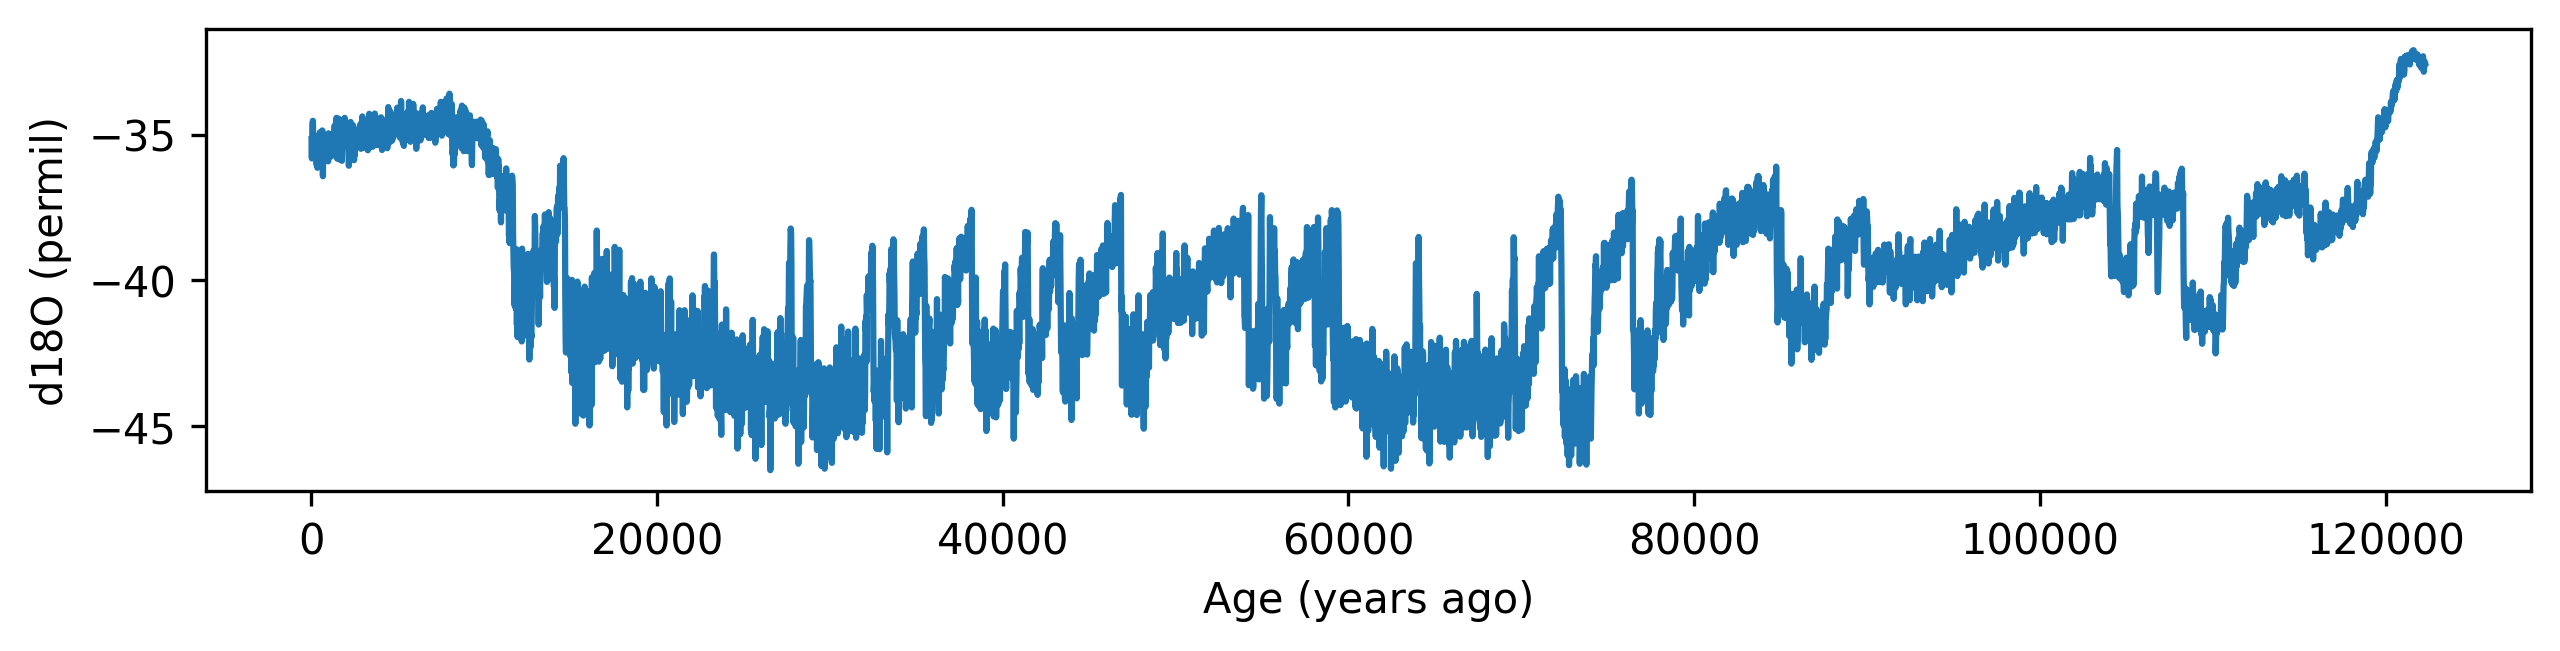

In [137]:
# plot the data
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 2), dpi= 300, facecolor='w', edgecolor='k')
plt.plot(df['age'], df['d18o'])
plt.xlabel('Age (years ago)')
plt.ylabel('d18O (permil)') # d18O is the oxygen isotope ratio, which is a proxy for temperature
plt.show()

# Download the low-resolution planktonic d18O (sea surface temperature) data from North Atlantic for last 1,500 kyr

Reference:
Hodell, D., Crowhurst, S., Lourens, L., Margari, V., Nicolson, J., Rolfe, J., ... & Wolff, E. (2023). A 1.5-million-year record of orbital and millennial climate variability in the North Atlantic.

In [26]:
# download David's data for millennial scale events using requests
import requests
import os

import os
if not os.path.exists('original_data'):
    os.makedirs('original_data')

zip_file='original_data/m_event_data_Hodel_2023.zip'

if os.path.isfile(zip_file):
    print('Data already downloaded')
else:
    print('Data not found, downloading...')
    url='https://doi.pangaea.de/10.1594/PANGAEA.951401?format=zip'
    r = requests.get(url)
    with open('original_data/m_event_data_Hodel_2023.zip', 'wb') as f:
        f.write(r.content)

# exact specified files from the zip file
if os.path.isfile('original_data/MD01-2444_339-U1385_combined_G_bulloides.tab'):
    print('Data already unzipped')
else:
    print('Data not found, unzipping...')
    import zipfile
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        #zip_ref.extract('datasets/MD01-2444_339-U1385_combined_benthic_O18.tab', 'original_data/')
        zip_ref.extract('datasets/MD01-2444_339-U1385_combined_G_bulloides.tab', 'original_data/')
        print('Data unzipped')

Data already downloaded
Data not found, unzipping...
Data unzipped


In [113]:
# read in the data
import pandas as pd
#benithic = pd.read_csv('D:/VScode/NS_syn/data/datasets/MD01-2444_339-U1385_combined_benthic_O18.tab', delimiter='\t', skiprows=29, header=0)
plank=pd.read_csv('original_data/datasets/MD01-2444_339-U1385_combined_G_bulloides.tab', delimiter='\t', skiprows=30, header=0)

In [114]:
plank

,Depth sed [m] (MD01-2444),"Depth corr cr [crmcd] (Equivalent 339-U1385 crmcd, I...)",Age [ka BP] (Hybrid Age),Age [ka BP] (Age model according to Lisiec...),Age [ka BP] (Age model according to Ahn et...),Age [ka BP] (Age model according to Konijn...),Age [ka BP] (Age model according to Barker...),Age [ka BP] (Antarctic ice core chronology...),Age [ka BP] (Age model according to Buizer...),"G. bulloides δ18O [‰ PDB] (vs. VPDB, Mass spectrometer, ...)","G. bulloides δ13C [‰ PDB] (vs. VPDB, Mass spectrometer, ...)"
0,0.00,0.00,0.00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.47,-0.57
1,0.12,0.02,0.12,0.10477,0.10477,0.12519,0.59946,0.63915,0.64603,0.26,-0.66
2,0.15,0.02,0.15,0.13096,0.13096,0.15649,0.74932,0.79893,0.80754,0.44,-0.48
3,0.18,0.03,0.18,0.15715,0.15715,0.18779,0.89919,0.95872,0.96904,0.44,-0.73
4,0.21,0.04,0.26,0.23551,0.23551,0.28143,1.04900,1.11850,1.13050,0.48,-0.65
...,...,...,...,...,...,...,...,...,...,...,...
8720,NaN,166.20,1430.40,1427.20000,1430.50000,1443.80000,NaN,NaN,NaN,0.48,-0.84
8721,NaN,166.22,1430.50,1427.30000,1430.70000,1444.00000,NaN,NaN,NaN,0.25,-1.00
8722,NaN,166.24,1430.70,1427.40000,1430.80000,1444.10000,NaN,NaN,NaN,0.36,-0.81
8723,NaN,166.26,1430.80,1427.60000,1431.00000,1444.30000,NaN,NaN,NaN,0.35,-0.65


In [115]:
plank=plank[['Age [ka BP] (Hybrid Age)','G. bulloides δ18O [‰ PDB] (vs. VPDB, Mass spectrometer, ...)','G. bulloides δ13C [‰ PDB] (vs. VPDB, Mass spectrometer, ...)']]
plank.rename(columns={'Age [ka BP] (Hybrid Age)':'age', 'G. bulloides δ18O [‰ PDB] (vs. VPDB, Mass spectrometer, ...)':'d18O', 'G. bulloides δ13C [‰ PDB] (vs. VPDB, Mass spectrometer, ...)':'d13C'}, inplace=True)


C:\Users\zps19\AppData\Local\Temp\ipykernel_25760\3380766652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plank.rename(columns={'Age [ka BP] (Hybrid Age)':'age', 'G. bulloides δ18O [‰ PDB] (vs. VPDB, Mass spectrometer, ...)':'d18O', 'G. bulloides δ13C [‰ PDB] (vs. VPDB, Mass spectrometer, ...)':'d13C'}, inplace=True)


In [117]:
# drop column 'd13C'
plank = plank.drop(['d13C'], axis=1)
plank

,age,d18O
0,0.00,0.47
1,0.12,0.26
2,0.15,0.44
3,0.18,0.44
4,0.26,0.48
...,...,...
8720,1430.40,0.48
8721,1430.50,0.25
8722,1430.70,0.36
8723,1430.80,0.35


In [123]:
# drop the rows with missing values
plank = plank.dropna()
# the age column need to multiply by 1000
plank['age'] = plank['age']*1000
plank

,age,d18O
0,0.0,0.47
1,120.0,0.26
2,150.0,0.44
3,180.0,0.44
4,260.0,0.48
...,...,...
8720,1430400.0,0.48
8721,1430500.0,0.25
8722,1430700.0,0.36
8723,1430800.0,0.35


In [124]:
# save the data as a csv file
if not os.path.exists('processed_data'):
    os.makedirs('processed_data')
plank.to_csv('processed_data/low_res_plank_d18O_1500kyr.csv', index=False)

In [139]:
# read the csv file
plank = pd.read_csv('processed_data/low_res_plank_d18O_1500kyr.csv')

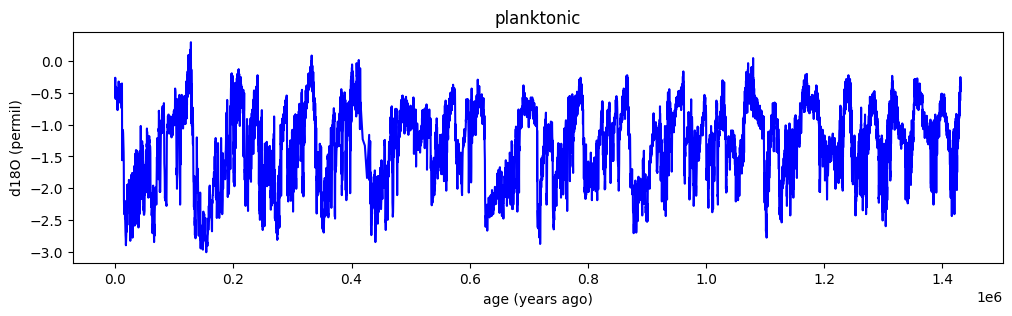

In [140]:
# plot the data
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(plank['age'], -1*plank['d18O'], 'b')
ax.set_xlabel('age (years ago)')
ax.set_ylabel('d18O (permil)')
ax.set_title('planktonic')
plt.subplots_adjust(hspace=0.5)
plt.show()

# Download the CH4 data from Antarctic ice core (EDC) for past 800 kyr

Reference:
Loulergue, L., Schilt, A., Spahni, R., Masson-Delmotte, V., Blunier, T., Lemieux, B., ... & Chappellaz, J. (2008). Orbital and millennial-scale features of atmospheric CH4 over the past 800,000 years. Nature, 453(7193), 383-386.

In [44]:
# download the .xls CH4 data from the web
import requests

url='https://static-content.springer.com/esm/art%3A10.1038%2Fnature06950/MediaObjects/41586_2008_BFnature06950_MOESM33_ESM.xls'

response = requests.get(url)

# create a folder in the current directory to store the data if it does not exist
import os
if not os.path.exists('original_data'):
    os.makedirs('original_data')


# write the content of the server response to a local file
with open('original_data/41586_2008_BFnature06950_MOESM33_ESM.xls', 'wb') as f:
    f.write(response.content)


In [47]:
!pip install xlrd

     ---------------------------------------- 96.5/96.5 kB 5.8 MB/s eta 0:00:00


In [131]:
# read the xls file
import pandas as pd
df = pd.read_excel('original_data/41586_2008_BFnature06950_MOESM33_ESM.xls', sheet_name='CH4_EDC', skiprows=18, names=['age','CH4','1sigma_uncertainty'], usecols=[1,2,3])
df

,age,CH4,1sigma_uncertainty
0,13.4,907.000000,10.0
1,125.7,784.470000,10.0
2,129.6,761.700000,10.0
3,151.2,710.489633,10.0
4,184.3,726.800000,10.0
...,...,...,...
2098,794938.0,428.300000,10.0
2099,796319.7,418.000000,10.0
2100,797277.0,396.100000,10.0
2101,798417.4,457.800000,10.0


In [132]:
# drop the column 1sigma_uncertainty
df = df.drop(['1sigma_uncertainty'], axis=1)
# drop the rows with missing values
df = df.dropna()
df

,age,CH4
0,13.4,907.000000
1,125.7,784.470000
2,129.6,761.700000
3,151.2,710.489633
4,184.3,726.800000
...,...,...
2098,794938.0,428.300000
2099,796319.7,418.000000
2100,797277.0,396.100000
2101,798417.4,457.800000


In [133]:
# save the data as a csv file
if not os.path.exists('processed_data'):
    os.makedirs('processed_data')
df.to_csv('processed_data/low_res_CH4_800kyr.csv', index=False)

In [151]:
# load the data
import pandas as pd
df = pd.read_csv('processed_data/low_res_CH4_800kyr.csv')

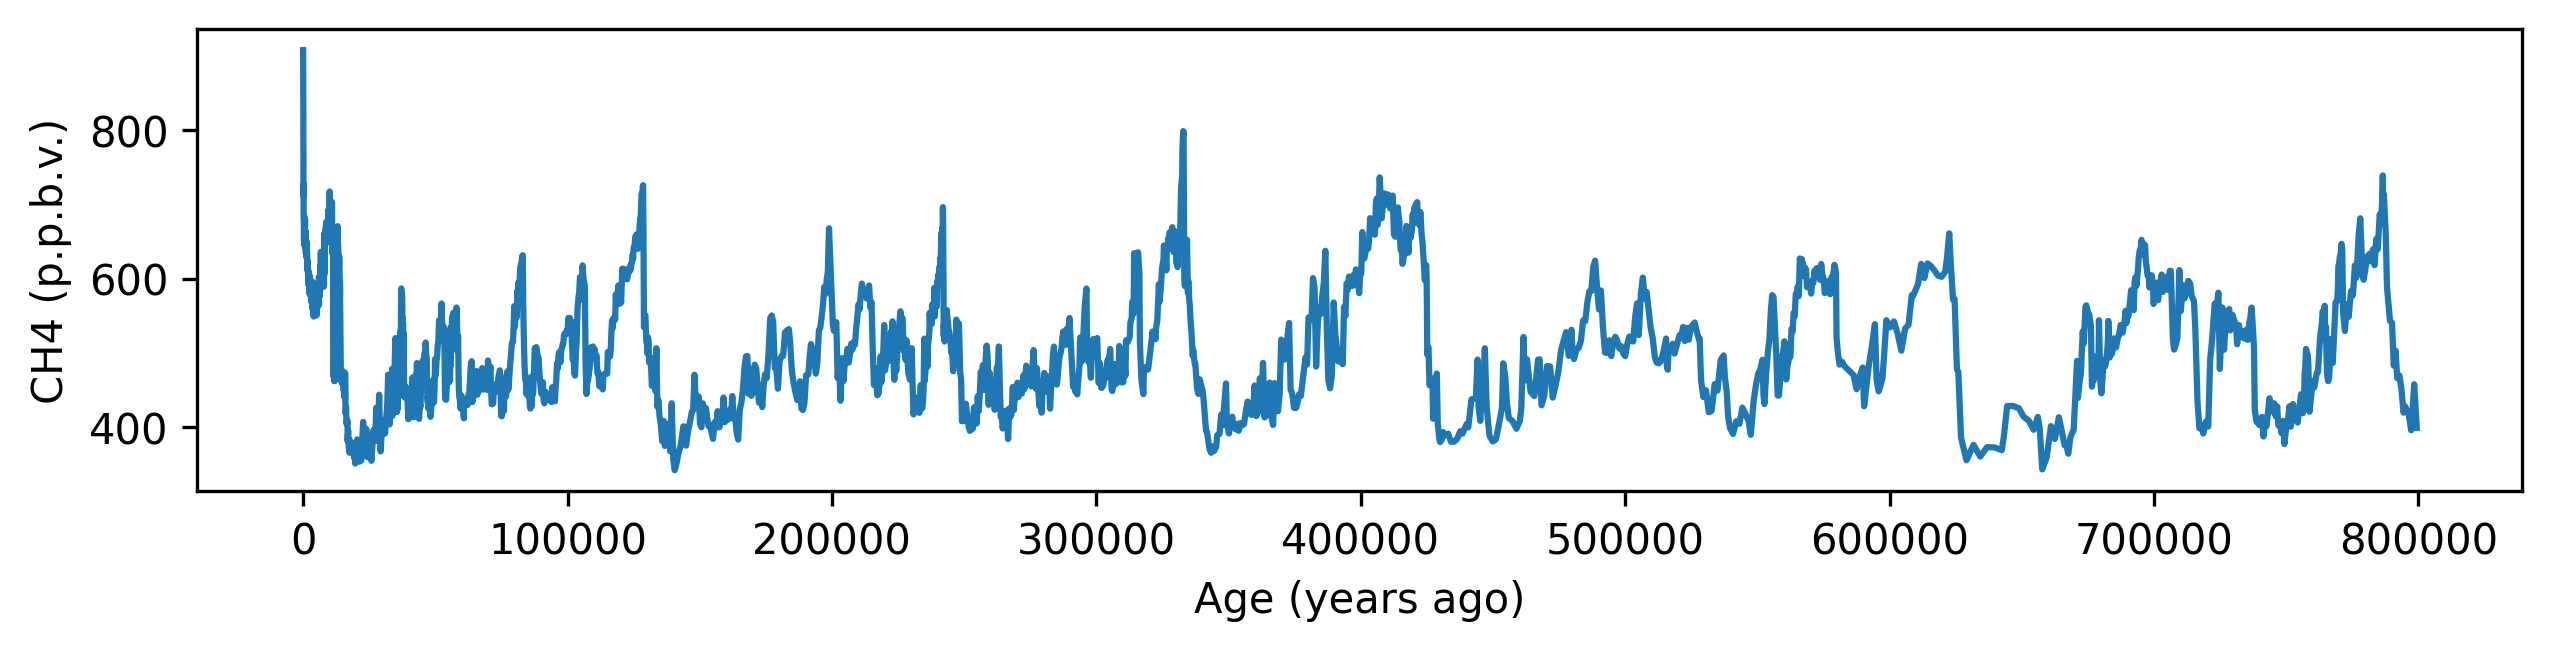

In [152]:
# plot the data
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 2), dpi= 300, facecolor='w', edgecolor='k')
plt.plot(df['age'], df['CH4'])
plt.xlabel('Age (years ago)')
plt.ylabel('CH4 (p.p.b.v.)')
plt.show()

# Download the Antarctic temperature record (EDC d18O) for past 800 kyr

Reference: Jouzel, J., Masson-Delmotte, V., Cattani, O., Dreyfus, G., Falourd, S., Hoffmann, G., ... & Wolff, E. W. (2007). Orbital and millennial Antarctic climate variability over the past 800,000 years. science, 317(5839), 793-796.

In [57]:
# download the .txt data from the web
import requests

url='https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt'

response = requests.get(url)

# create a folder in the current directory to store the data if it does not exist
import os
if not os.path.exists('original_data'):
    os.makedirs('original_data')


# write the content of the server response to a local file
with open('original_data/edc3deuttemp2007.txt', 'wb') as f:
    f.write(response.content)

In [144]:
# read the txt file
import pandas as pd
df = pd.read_csv('original_data/edc3deuttemp2007.txt',encoding='ISO-8859-1',skiprows=91, names=['age','dD','temperature'], usecols=[2,3,4], delim_whitespace=True)
# remove the first row
df = df.iloc[1:]
# remove the column dD
df = df.drop(columns=['dD'])
df

,age,temperature
1,-50.00000,NaN
2,-43.54769,NaN
3,-37.41829,NaN
4,-31.61153,NaN
5,-24.51395,NaN
...,...,...
5796,797408,-8.73
5797,798443,-8.54
5798,799501,-8.88
5799,800589,-8.92


In [145]:
# drop the rows with missing values
df = df.dropna()
df

,age,temperature
13,38.37379,0.88
14,46.81203,1.84
15,55.05624,3.04
16,64.41511,0.35
17,73.15077,-0.42
...,...,...
5796,797408,-8.73
5797,798443,-8.54
5798,799501,-8.88
5799,800589,-8.92


In [146]:
# save the data as a csv file
if not os.path.exists('processed_data'):
    os.makedirs('processed_data')
df.to_csv('processed_data/low_res_AT_800kyr.csv', index=False)


In [147]:
# load the data
import pandas as pd
df = pd.read_csv('processed_data/low_res_AT_800kyr.csv')

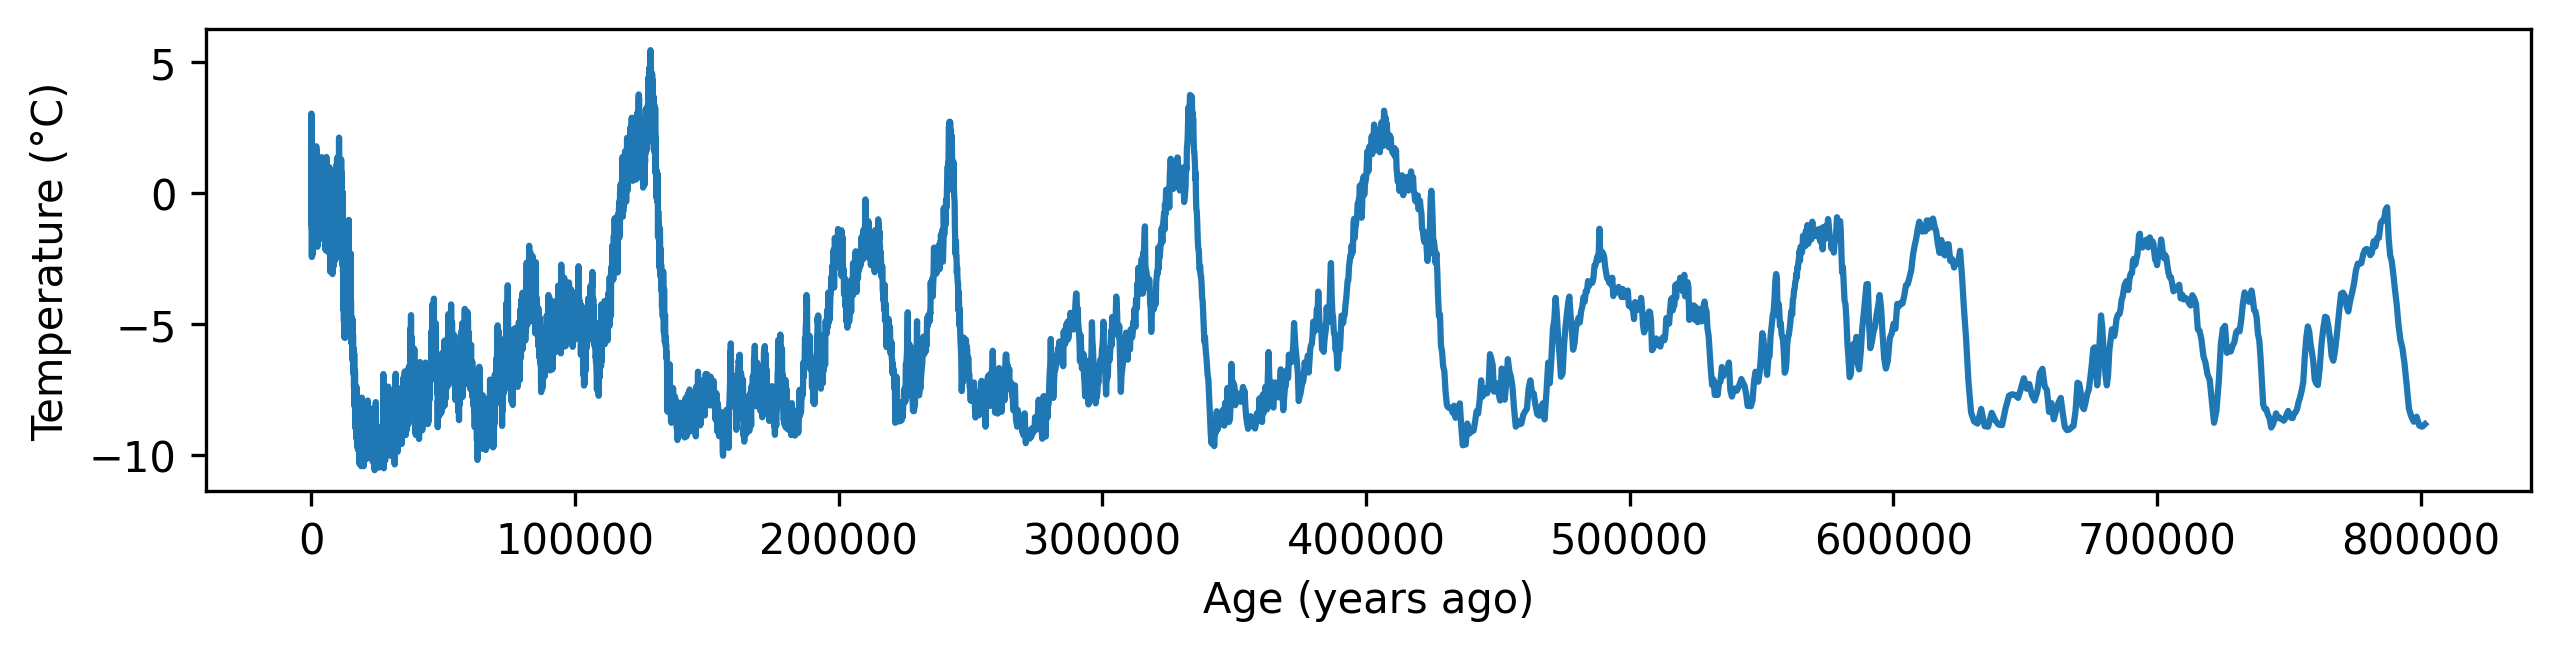

In [149]:
# plot the data
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 2), dpi= 300, facecolor='w', edgecolor='k')
plt.plot(df['age'], df['temperature'])
plt.xlabel('Age (years ago)')
plt.ylabel('Temperature (°C)')
plt.show()

# Download the Antarctic temperature record (Fuji d18O) for past 720 kyr

Reference: 

Dome Fuji Ice Core Project Members:, Kawamura, K., Abe-Ouchi, A., Motoyama, H., Ageta, Y., Aoki, S., ... & Yoshimoto, T. (2017). State dependence of climatic instability over the past 720,000 years from Antarctic ice cores and climate modeling. Science advances, 3(2), e1600446.

Uemura, R., Motoyama, H., Masson-Delmotte, V., Jouzel, J., Kawamura, K., Goto-Azuma, K., ... & Fujii, Y. (2018). Asynchrony between Antarctic temperature and CO2 associated with obliquity over the past 720,000 years. Nature communications, 9(1), 961.

In [87]:
# download the .txt data from the web
import requests

url='https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/domefuji/domefuji2018iso-temp.txt'

response = requests.get(url)

# create a folder in the current directory to store the data if it does not exist
import os
if not os.path.exists('original_data'):
    os.makedirs('original_data')


# write the content of the server response to a local file
with open('original_data/domefuji2018iso-temp.txt', 'wb') as f:
    f.write(response.content)


In [93]:
# read the txt file
import pandas as pd
df = pd.read_csv('original_data/domefuji2018iso-temp.txt',encoding='ISO-8859-1',skiprows=118, names=['age','d18O','dD','temperature'], usecols=[2,3,4,7], delim_whitespace=True)
# drop the column dD and d18O
df = df.drop(columns=['dD','d18O'])
df

,age,temperature
0,-61.00,3.6
1,-33.00,4.0
2,6.00,2.4
3,50.00,-1.0
4,66.00,-1.3
...,...,...
7531,-56.14,NaN
7532,-56.23,NaN
7533,-56.19,NaN
7534,-56.18,NaN


In [97]:
# remove rows with nan values
df = df.dropna()
df

,age,temperature
0,-61.0,3.6
1,-33.0,4.0
2,6.0,2.4
3,50.0,-1.0
4,66.0,-1.3
...,...,...
7465,715724.0,-2.1
7466,715766.0,-1.9
7467,715808.0,-1.8
7468,715850.0,-1.9


In [98]:
# save the data as a csv file
if not os.path.exists('processed_data'):
    os.makedirs('processed_data')
df.to_csv('processed_data/low_res_AT_720kyr.csv', index=False)

In [153]:
# load the data
import pandas as pd
df = pd.read_csv('processed_data/low_res_AT_720kyr.csv')
# check whether there are nan values
df.isnull().values.any()


False

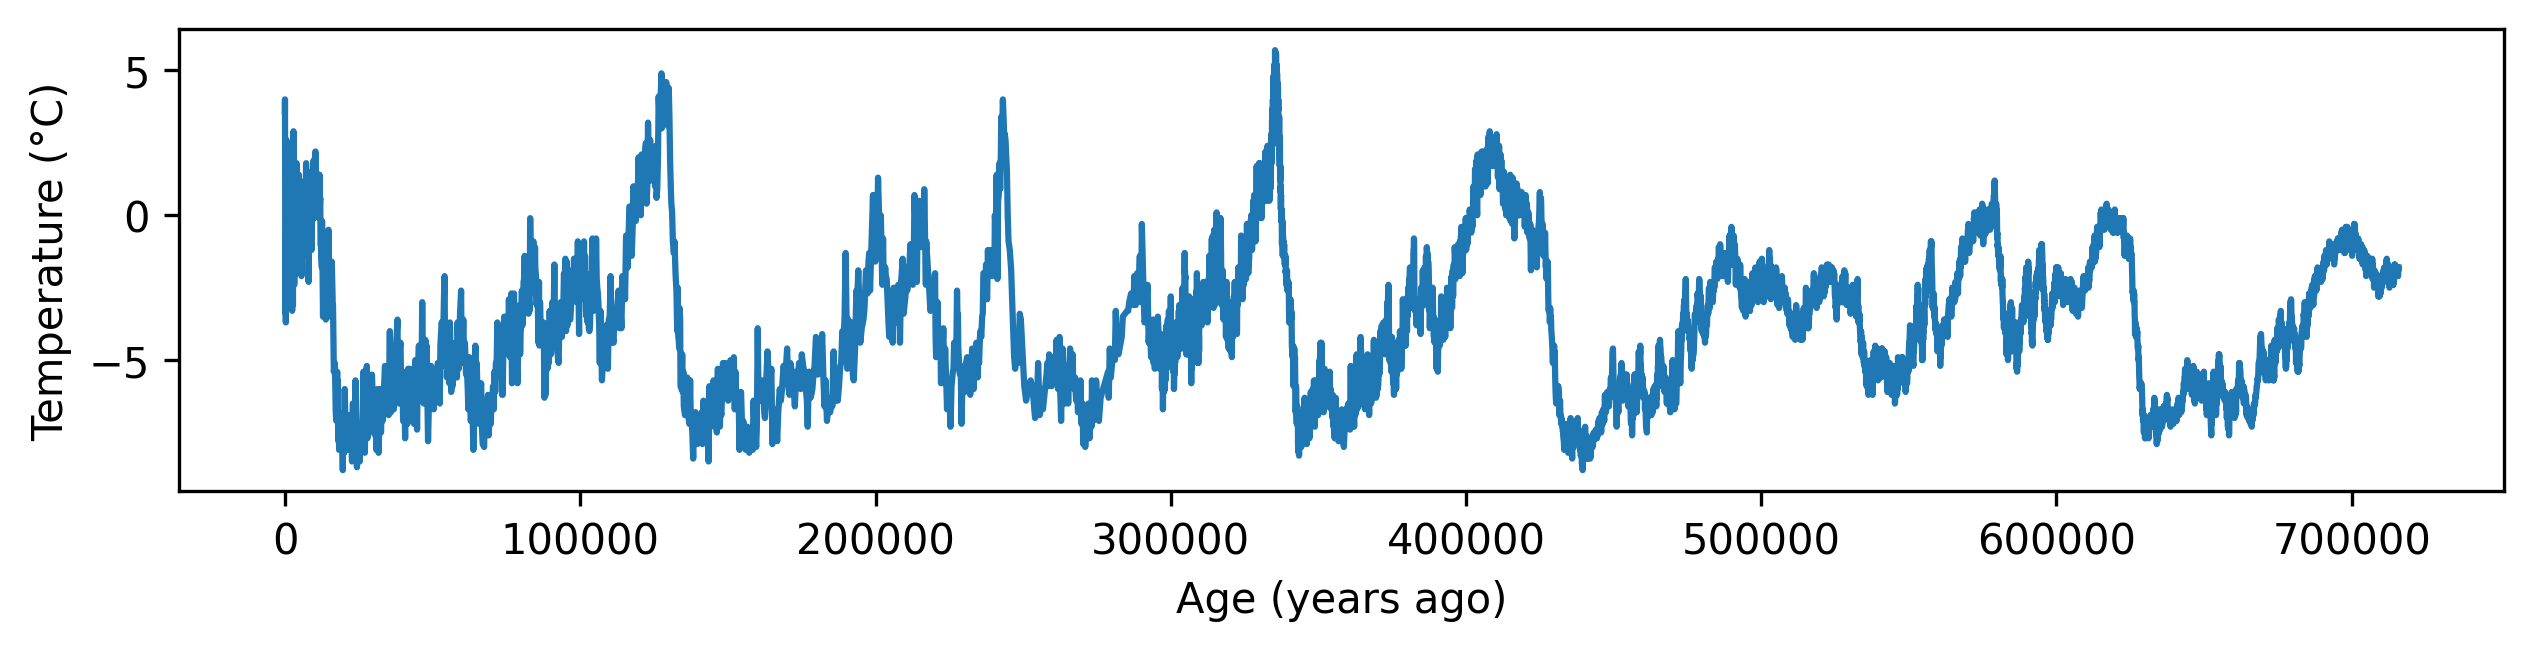

In [154]:
# plot the data
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 2), dpi= 300, facecolor='w', edgecolor='k')
plt.plot(df['age'], df['temperature'])
plt.xlabel('Age (years ago)')
plt.ylabel('Temperature (°C)')
plt.show()


# Download the synthetic Greenland temperature record (made from Antarctic data) from Barker et al., 2011 

Reference:

Barker, S., Knorr, G., Edwards, R. L., Parrenin, F., Putnam, A. E., Skinner, L. C., ... & Ziegler, M. (2011). 800,000 years of abrupt climate variability. science, 334(6054), 347-351.

In [159]:
!pip install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=3e7f62c87863b6b6535e674a7adeab254b6291d5d989671f67f4a3af1dc647ad
  Stored in directory: c:\users\zps19\appdata\local\pip\cache\wheels\8b\f1\7f\5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [167]:
# download the .zip data from the web
import os
if not os.path.exists('original_data'):
    os.makedirs('original_data')

os.chdir('original_data')
!wget --user-agent="Mozilla" https://www.science.org/doi/suppl/10.1126/science.1203580/suppl_file/1203580-barker_tables_s2-s3.zip
os.chdir('..')


--2023-05-02 17:17:48--  https://www.science.org/doi/suppl/10.1126/science.1203580/suppl_file/1203580-barker_tables_s2-s3.zip
Resolving www.science.org (www.science.org)... 104.18.27.207, 104.18.26.207
Connecting to www.science.org (www.science.org)|104.18.27.207|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.science.org/doi/suppl/10.1126/science.1203580/suppl_file/1203580-barker_tables_s2-s3.zip?cookieSet=1 [following]
--2023-05-02 17:17:49--  https://www.science.org/doi/suppl/10.1126/science.1203580/suppl_file/1203580-barker_tables_s2-s3.zip?cookieSet=1
Reusing existing connection to www.science.org:443.
HTTP request sent, awaiting response... 302 Found
Location: https://www.science.org/doi/suppl/10.1126/science.1203580/suppl_file/1203580-barker_tables_s2-s3.zip [following]
--2023-05-02 17:17:50--  https://www.science.org/doi/suppl/10.1126/science.1203580/suppl_file/1203580-barker_tables_s2-s3.zip
Reusing existing connection to www.science.

In [168]:
# unzip the file
import zipfile
with zipfile.ZipFile('original_data/1203580-barker_tables_s2-s3.zip', 'r') as zip_ref:
    zip_ref.extractall('original_data')


In [180]:
# read the .xls file
import pandas as pd
df = pd.read_excel('original_data/1203580s2.xls', sheet_name='Sheet1', skiprows=8, names=['age','temperature'], usecols=[0,4])
df

,age,temperature
0,5.00,-35.792563
1,5.05,-35.759061
2,5.10,-35.627542
3,5.15,-35.632183
4,5.20,-35.635277
...,...,...
15896,799.80,NaN
15897,799.85,NaN
15898,799.90,NaN
15899,799.95,NaN


In [181]:
# drop the rows with missing values
df = df.dropna()
# multiply the age by 1000
df['age'] = df['age']*1000
df

C:\Users\zps19\AppData\Local\Temp\ipykernel_25760\1253015593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age']*1000


,age,temperature
0,5000.0,-35.792563
1,5050.0,-35.759061
2,5100.0,-35.627542
3,5150.0,-35.632183
4,5200.0,-35.635277
...,...,...
15856,797800.0,-40.487902
15857,797850.0,-40.470457
15858,797900.0,-40.450036
15859,797950.0,-40.427500


In [182]:
# save the data as a csv file
if not os.path.exists('processed_data'):
    os.makedirs('processed_data')
df.to_csv('processed_data/low_res_GT_syn_EDC_800kyr.csv', index=False)


In [183]:
# load the data
import pandas as pd
df = pd.read_csv('processed_data/low_res_GT_syn_EDC_800kyr.csv')

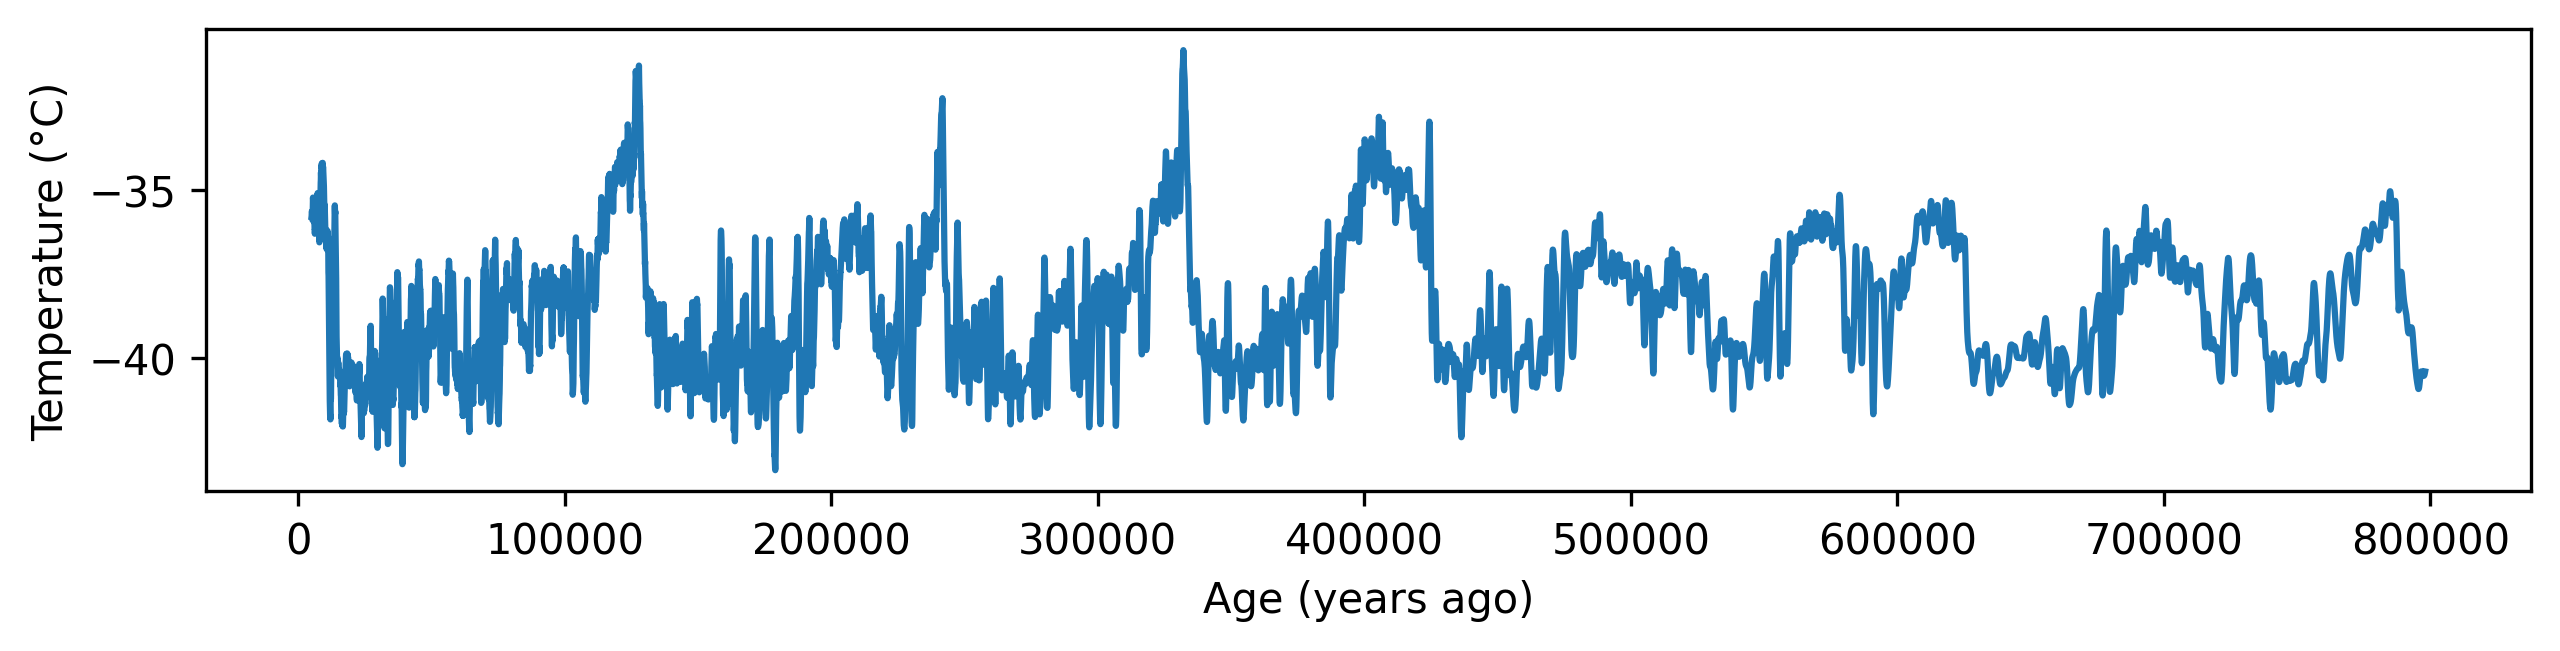

In [184]:
# plot the data
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 2), dpi= 300, facecolor='w', edgecolor='k')
plt.plot(df['age'], df['temperature'])
plt.xlabel('Age (years ago)')
plt.ylabel('Temperature (°C)')
plt.show()


# The following code use the method described in Barker et al. (2011) to generate the synthetic Greenland temperature record

In [207]:
# read in the EDC temperature data
import pandas as pd
df = pd.read_csv('processed_data/low_res_AT_800kyr.csv')
df

,age,temperature
0,38.37379,0.88
1,46.81203,1.84
2,55.05624,3.04
3,64.41511,0.35
4,73.15077,-0.42
...,...,...
5780,797408.00000,-8.73
5781,798443.00000,-8.54
5782,799501.00000,-8.88
5783,800589.00000,-8.92


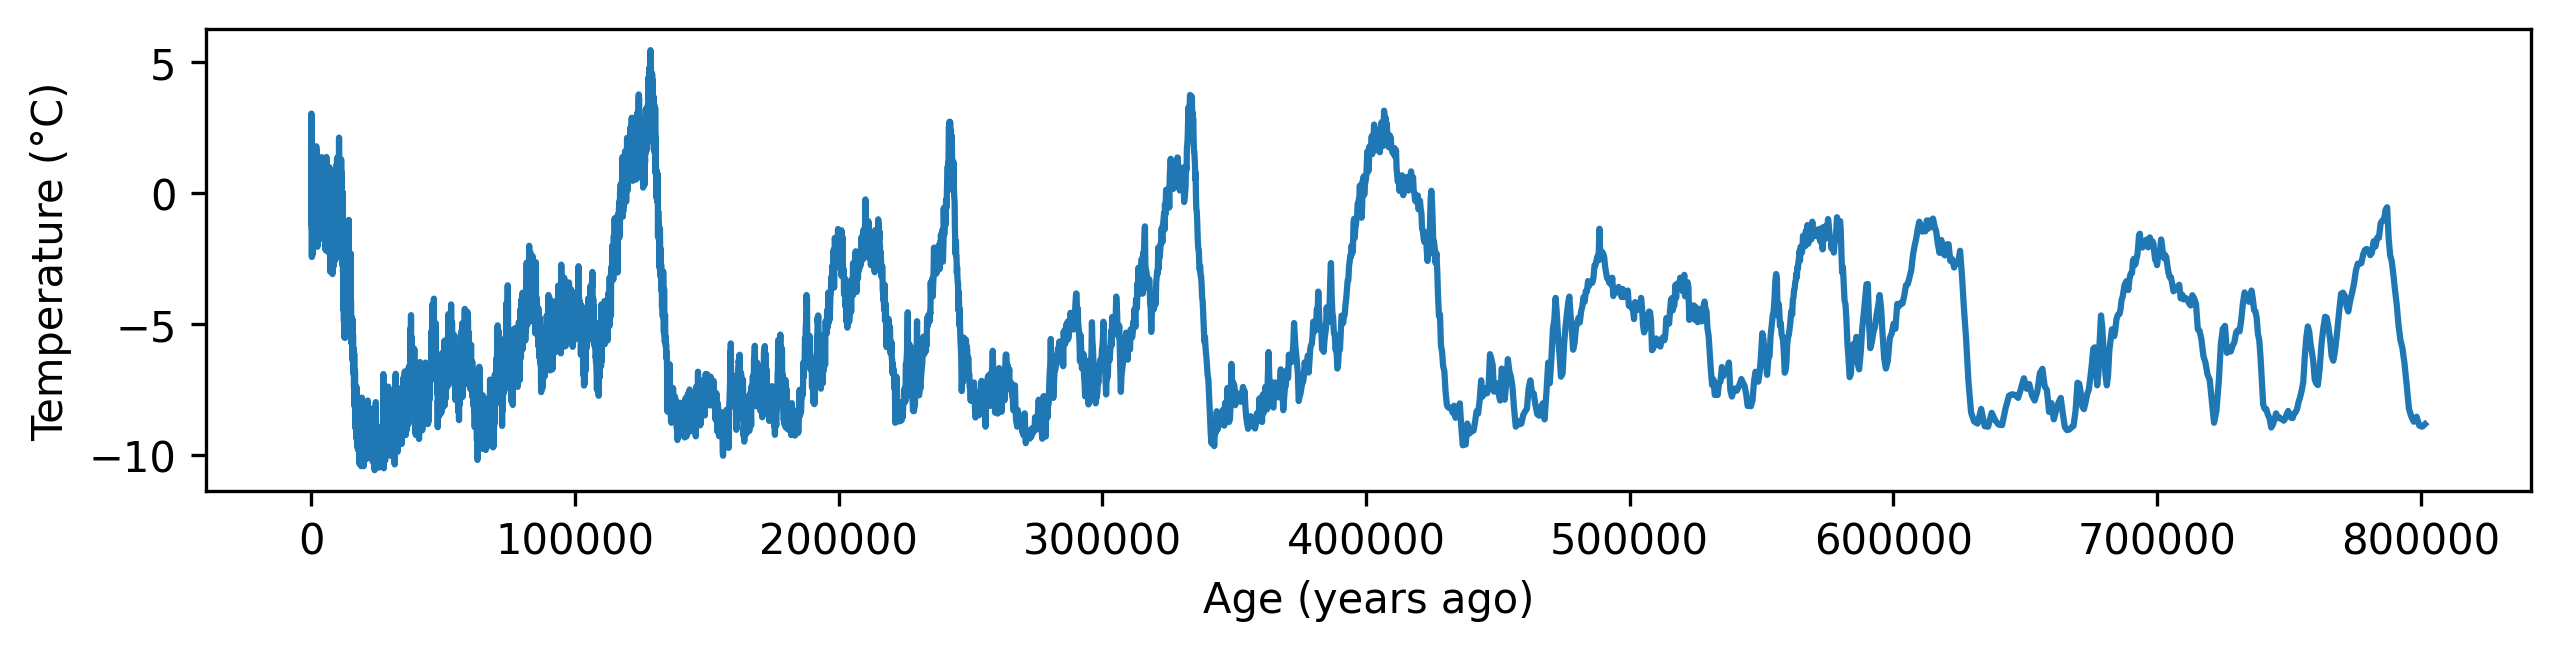

In [190]:
# plot the data
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 2), dpi= 300, facecolor='w', edgecolor='k')
plt.plot(df['age'], df['temperature'])
plt.xlabel('Age (years ago)')
plt.ylabel('Temperature (°C)')
plt.show()

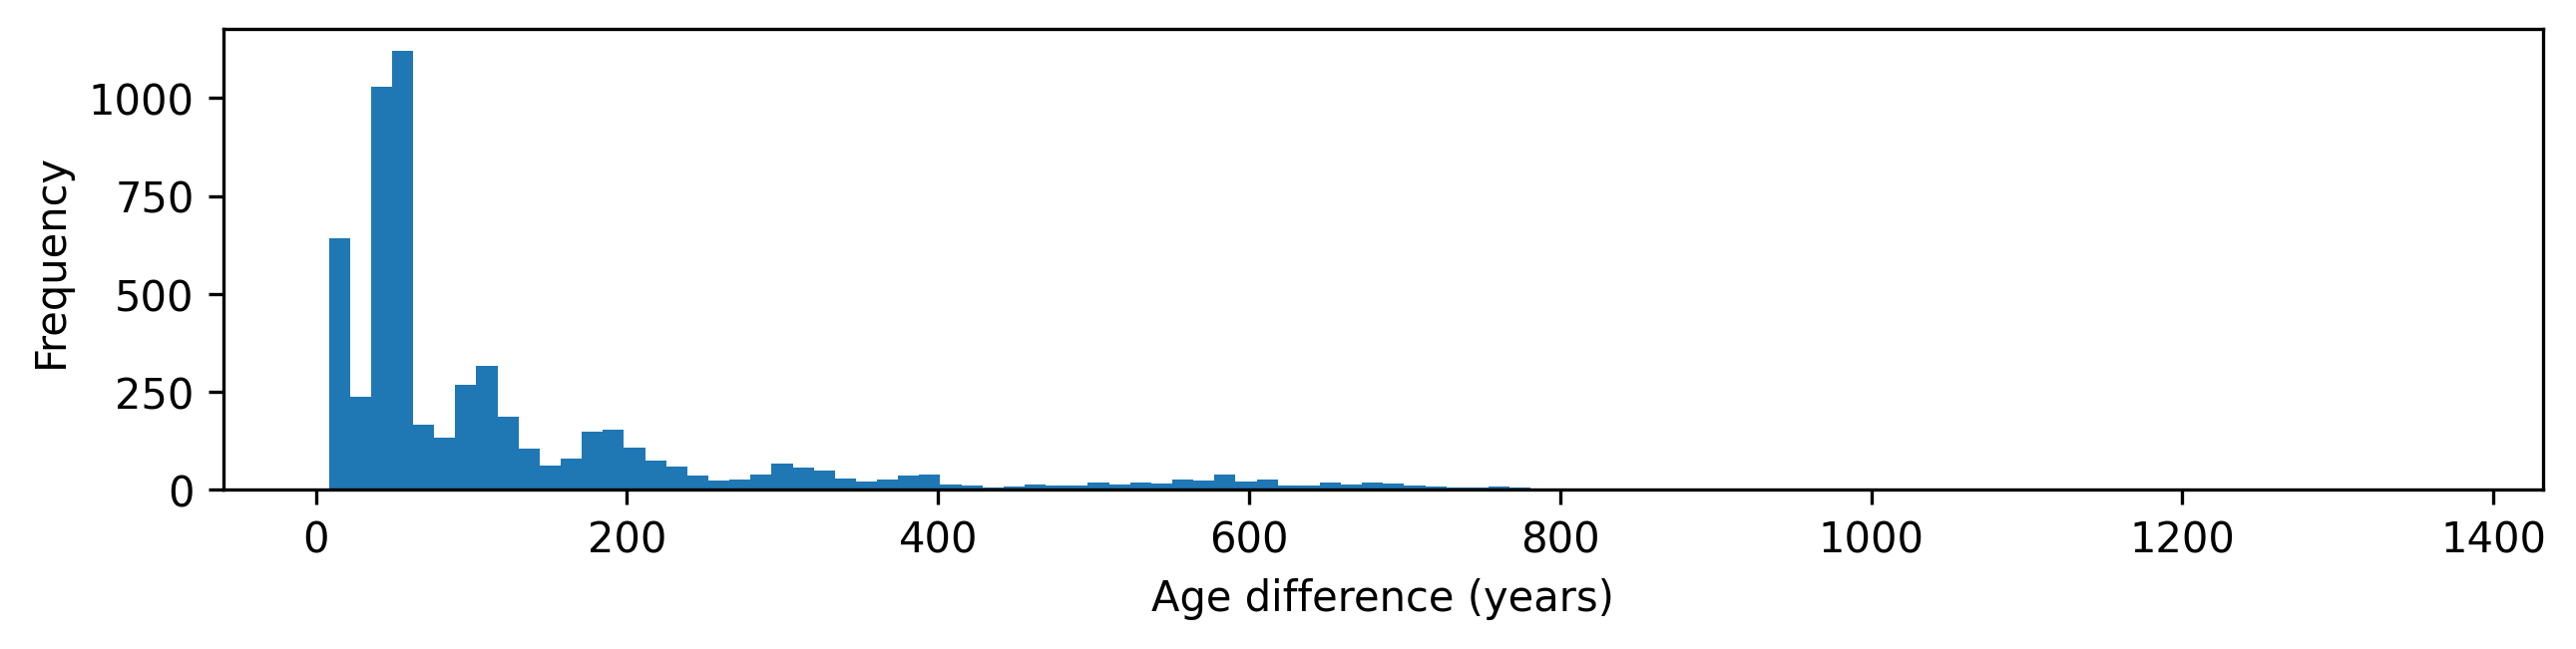

138.5932963710235

In [187]:
# calculate the age difference between two consecutive data points
df['age_diff'] = df['age'].diff()
# plot the age difference as histogram
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 2), dpi= 300, facecolor='w', edgecolor='k')
plt.hist(df['age_diff'], bins=100)
plt.xlabel('Age difference (years)')
plt.ylabel('Frequency')
plt.show()

# print the mean age difference
df['age_diff'].mean()

In [188]:
df.info

<bound method DataFrame.info of                age  temperature    age_diff
0         38.37379         0.88         NaN
1         46.81203         1.84     8.43824
2         55.05624         3.04     8.24421
3         64.41511         0.35     9.35887
4         73.15077        -0.42     8.73566
...            ...          ...         ...
5780  797408.00000        -8.73   959.00000
5781  798443.00000        -8.54  1035.00000
5782  799501.00000        -8.88  1058.00000
5783  800589.00000        -8.92  1088.00000
5784  801662.00000        -8.82  1073.00000

[5785 rows x 3 columns]>

In [208]:
# interpolate the age and temperature to a regular time step of 100 years
import numpy as np
df_new = pd.DataFrame()
df_new['age'] = np.arange(0, 800001, 100)
df_new['temperature'] = np.interp(df_new['age'], df['age'], df['temperature'])
df_new



,age,temperature
0,0,0.880000
1,100,-0.516079
2,200,0.196428
3,300,0.115777
4,400,-0.332781
...,...,...
7996,799600,-8.883640
7997,799700,-8.887316
7998,799800,-8.890993
7999,799900,-8.894669


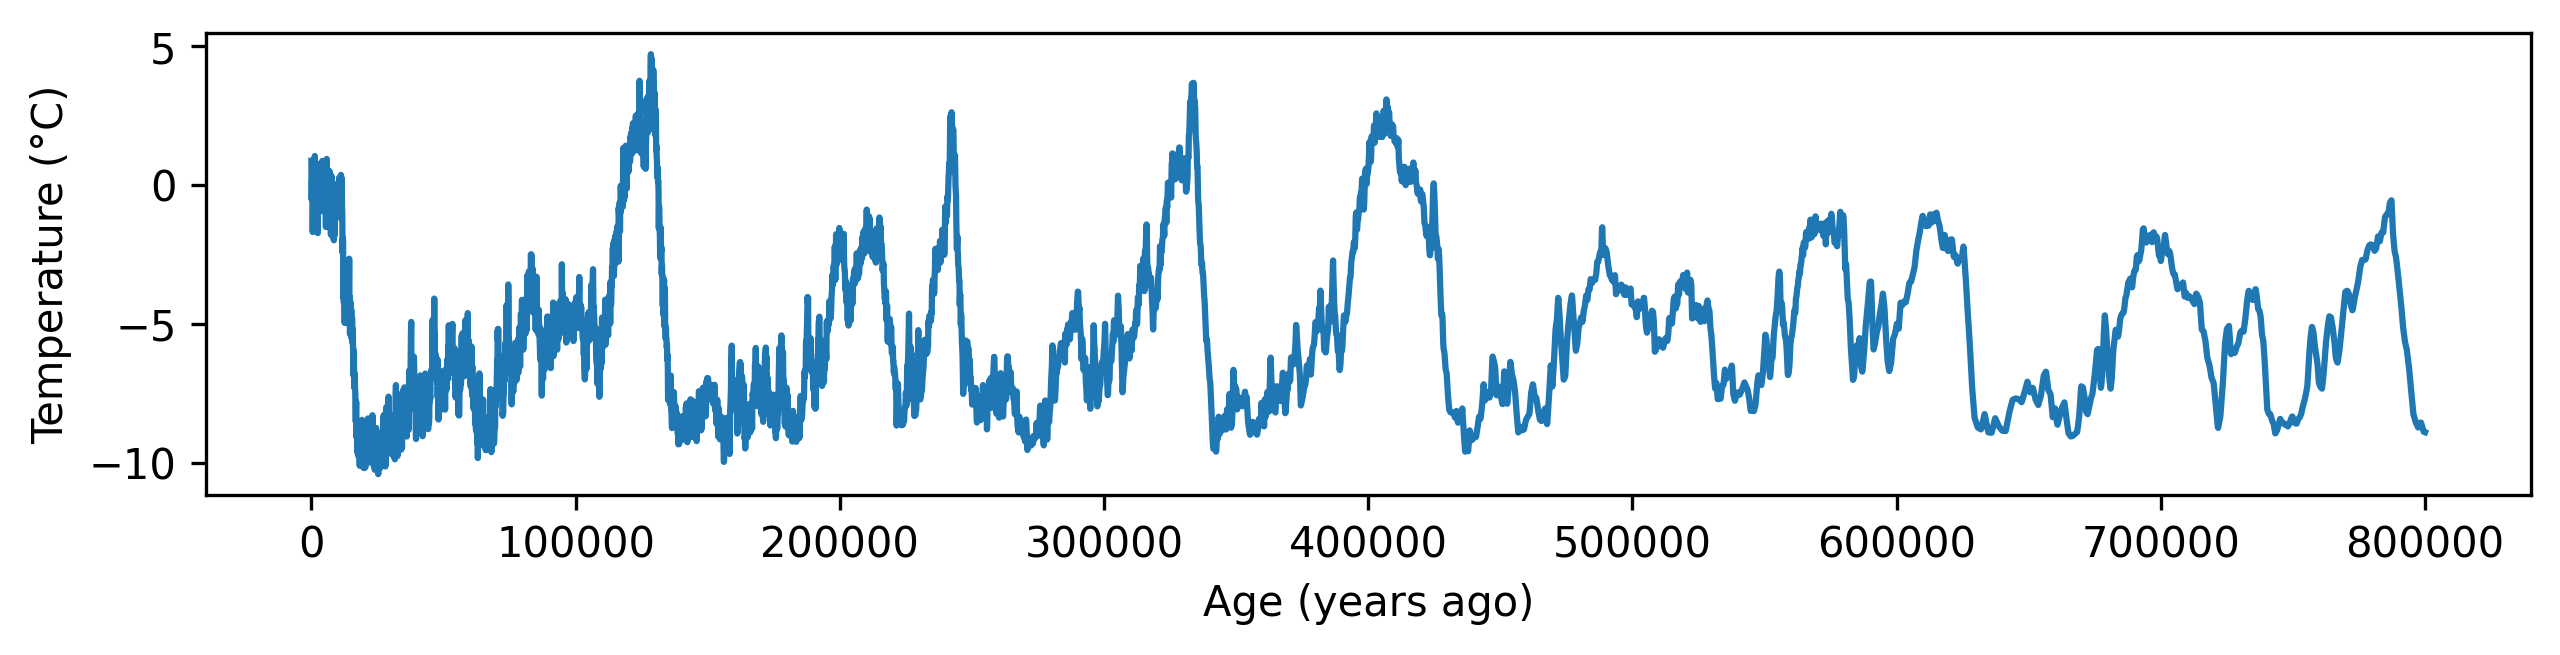

In [197]:
# plot the data
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 2), dpi= 300, facecolor='w', edgecolor='k')
plt.plot(df_new['age'], df_new['temperature'])
plt.xlabel('Age (years ago)')
plt.ylabel('Temperature (°C)')
plt.show()

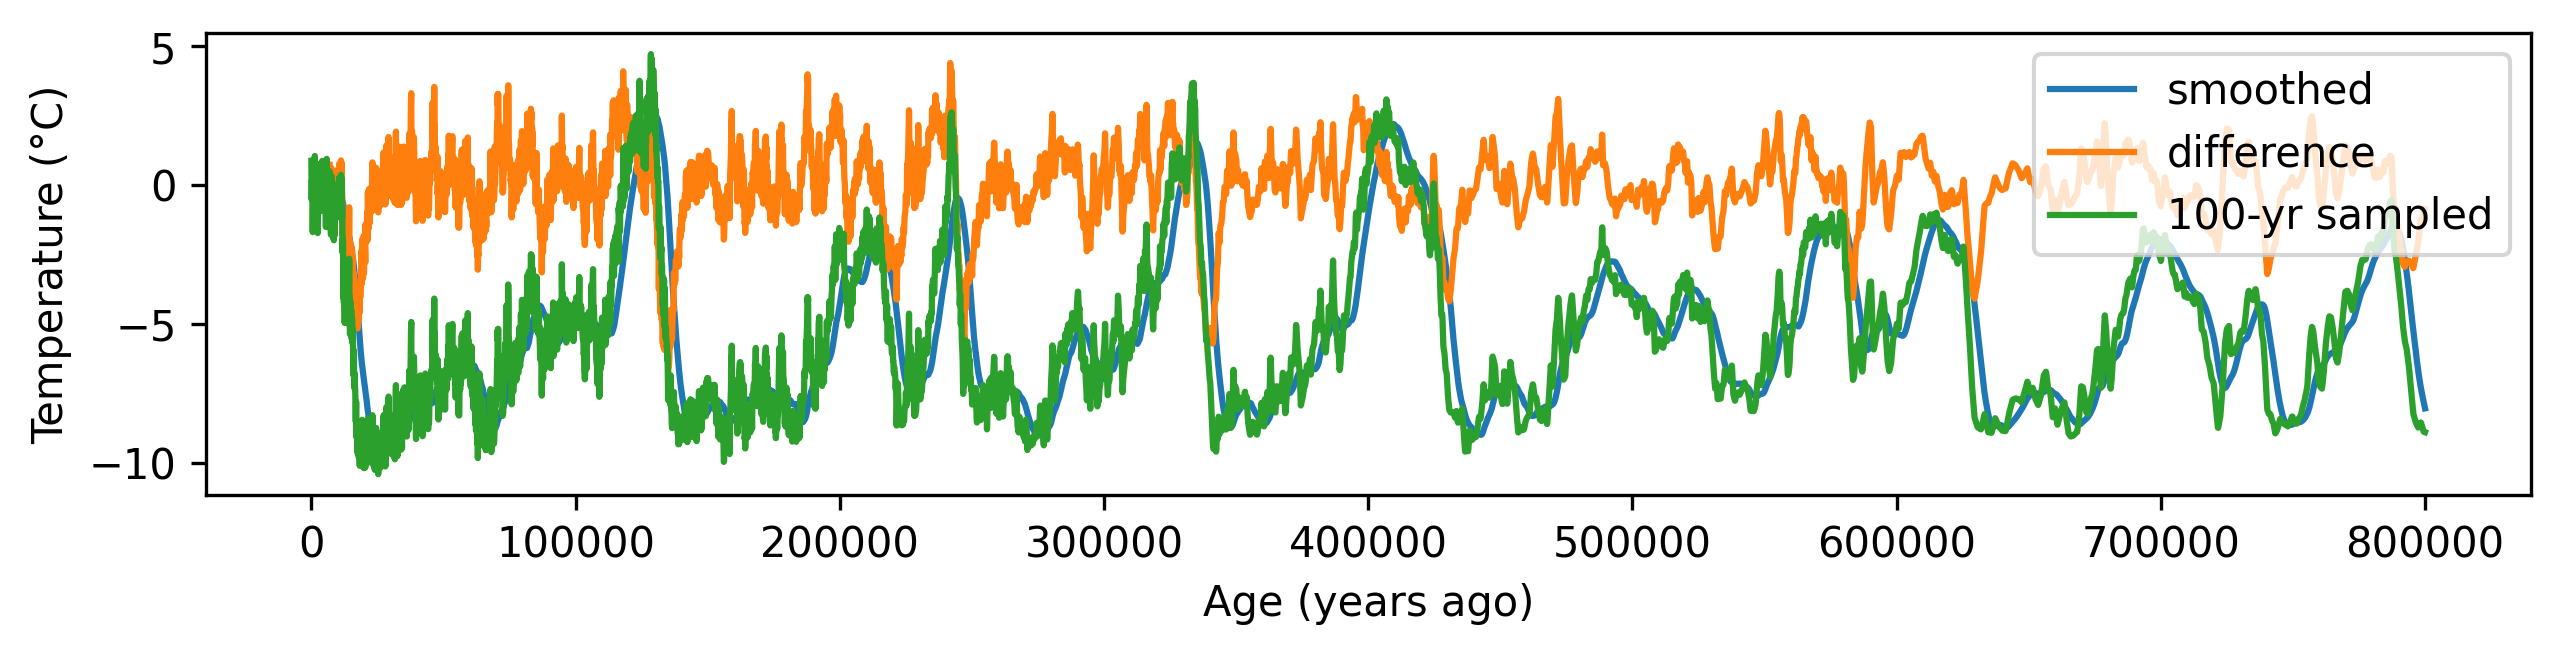

In [209]:
# smooth the data using a moving average filter with a window size of 7000 years
df_new['temperature_smoothed'] = df_new['temperature'].rolling(window=70).mean()
# calculate the difference between the smoothed and the original data
df_new['temperature_diff'] = df_new['temperature'] - df_new['temperature_smoothed']
# plot the 100-yr sampled, smoothed and difference data
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 2), dpi= 300, facecolor='w', edgecolor='k')
plt.plot(df_new['age'], df_new['temperature_smoothed'], label='smoothed')
plt.plot(df_new['age'], df_new['temperature_diff'], label='difference')
plt.plot(df_new['age'], df_new['temperature'], label='100-yr sampled')
plt.xlabel('Age (years ago)')
plt.ylabel('Temperature (°C)')
plt.legend()

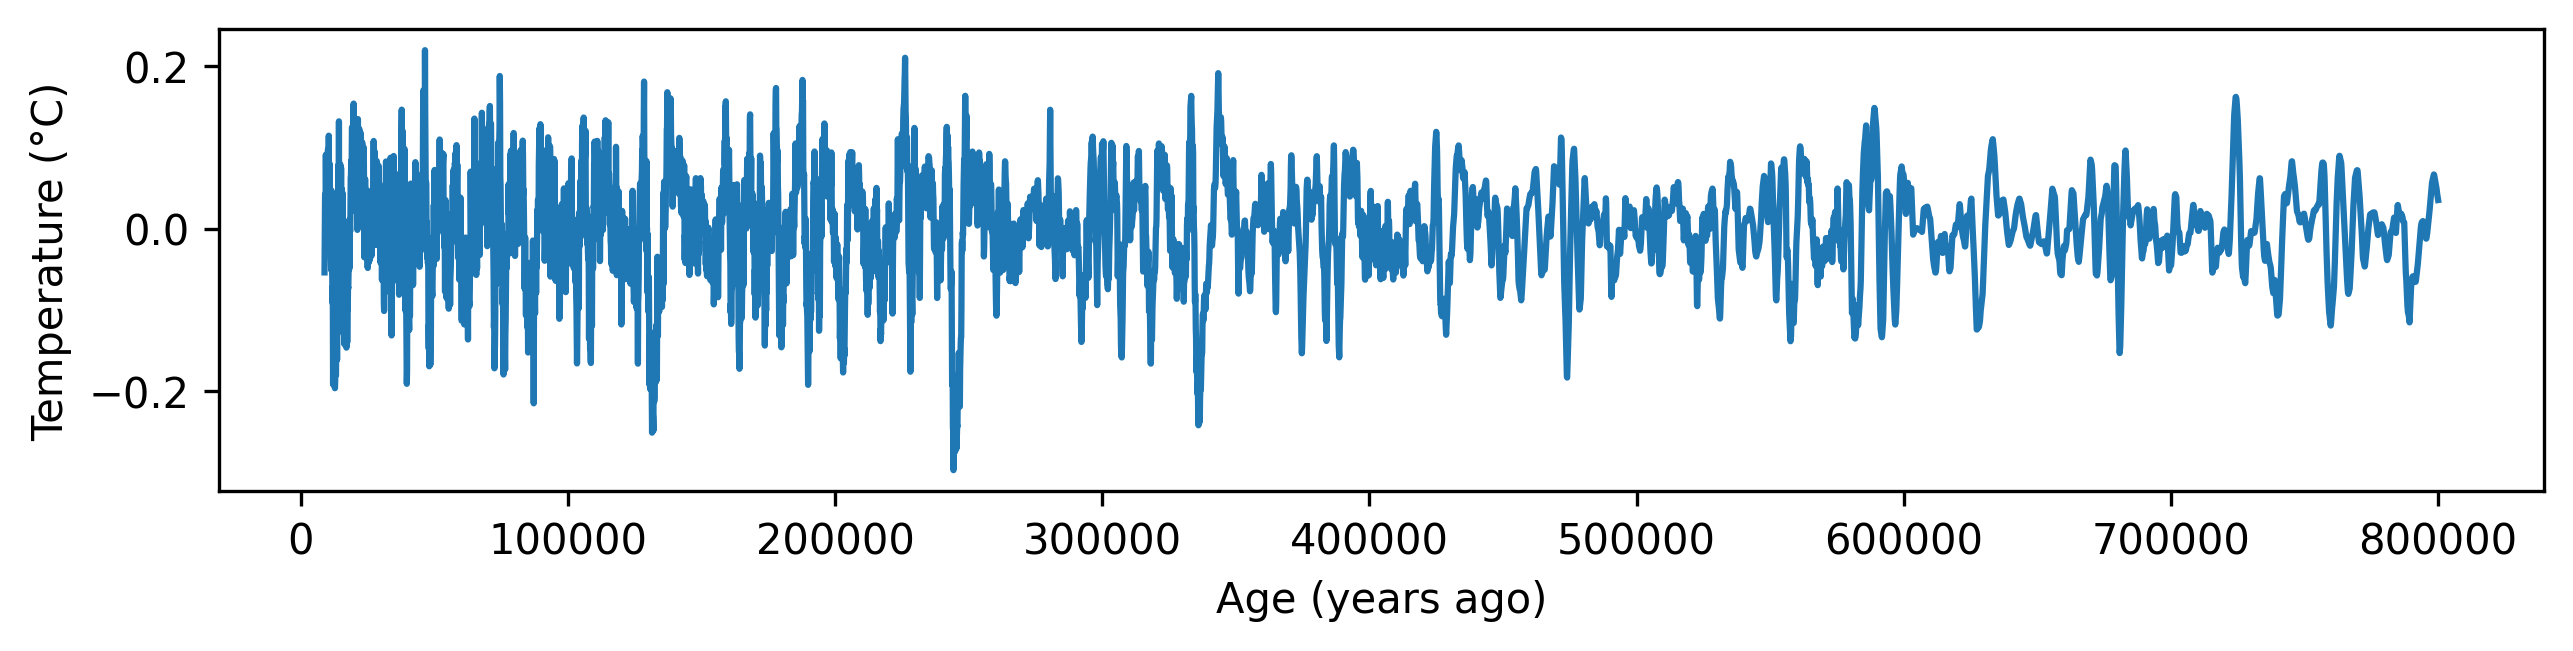

In [221]:
# calculate the derivative of the temperature difference
df_new['temperature_diff_derivative'] = df_new['temperature_diff'].diff()
# smooth the derivative using a moving average filter
df_new['temperature_diff_derivative'] = df_new['temperature_diff_derivative'].rolling(window=20).mean()
# plot the derivative
fig=plt.figure(figsize=(10, 2), dpi= 300, facecolor='w', edgecolor='k')
plt.plot(df_new['age'], df_new['temperature_diff_derivative'])
plt.xlabel('Age (years ago)')
plt.ylabel('Temperature (°C)')
plt.show()

In [203]:
# read the Greenland temperature data
import pandas as pd
df_GT = pd.read_csv('processed_data/hi_res_GT_120kyr.csv')
df_GT

,age,d18o
0,20,-35.16
1,40,-35.82
2,60,-35.11
3,80,-34.65
4,100,-34.53
...,...,...
6109,122200,-32.85
6110,122220,-32.66
6111,122240,-32.66
6112,122260,-32.51


In [205]:
# resample the data to a regular time step of 100 years
df_GT_new = pd.DataFrame()
df_GT_new['age'] = np.arange(0, 120001, 100)
df_GT_new['d18o'] = np.interp(df_GT_new['age'], df_GT['age'], df_GT['d18o'])
df_GT_new

,age,d18o
0,0,-35.16
1,100,-34.53
2,200,-35.16
3,300,-35.36
4,400,-35.35
...,...,...
1196,119600,-34.91
1197,119700,-34.76
1198,119800,-34.82
1199,119900,-34.47


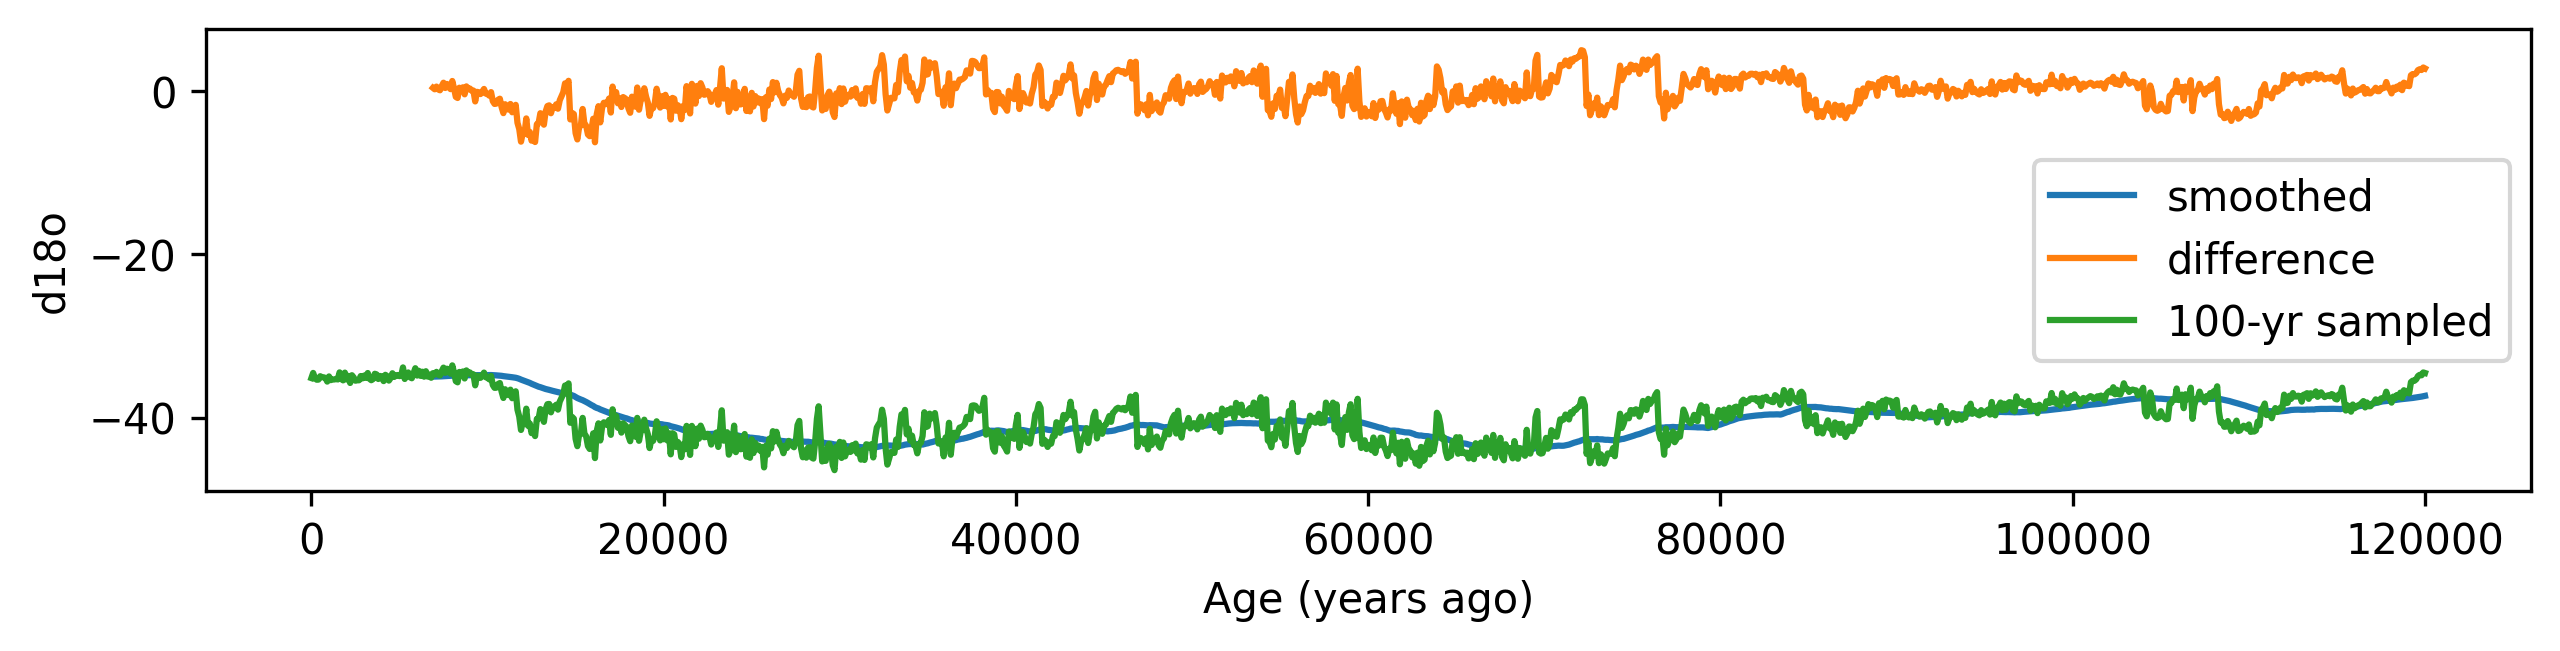

In [206]:
# smooth the data using a moving average filter with a window size of 7000 years
df_GT_new['d18o_smoothed'] = df_GT_new['d18o'].rolling(window=70).mean()
# calculate the difference between the smoothed and the original data
df_GT_new['d18o_diff'] = df_GT_new['d18o'] - df_GT_new['d18o_smoothed']
# plot the 100-yr sampled, smoothed and difference data
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 2), dpi= 300, facecolor='w', edgecolor='k')
plt.plot(df_GT_new['age'], df_GT_new['d18o_smoothed'], label='smoothed')
plt.plot(df_GT_new['age'], df_GT_new['d18o_diff'], label='difference')
plt.plot(df_GT_new['age'], df_GT_new['d18o'], label='100-yr sampled')
plt.xlabel('Age (years ago)')
plt.ylabel('d18o')
plt.legend()

(0.0, 120000.0)

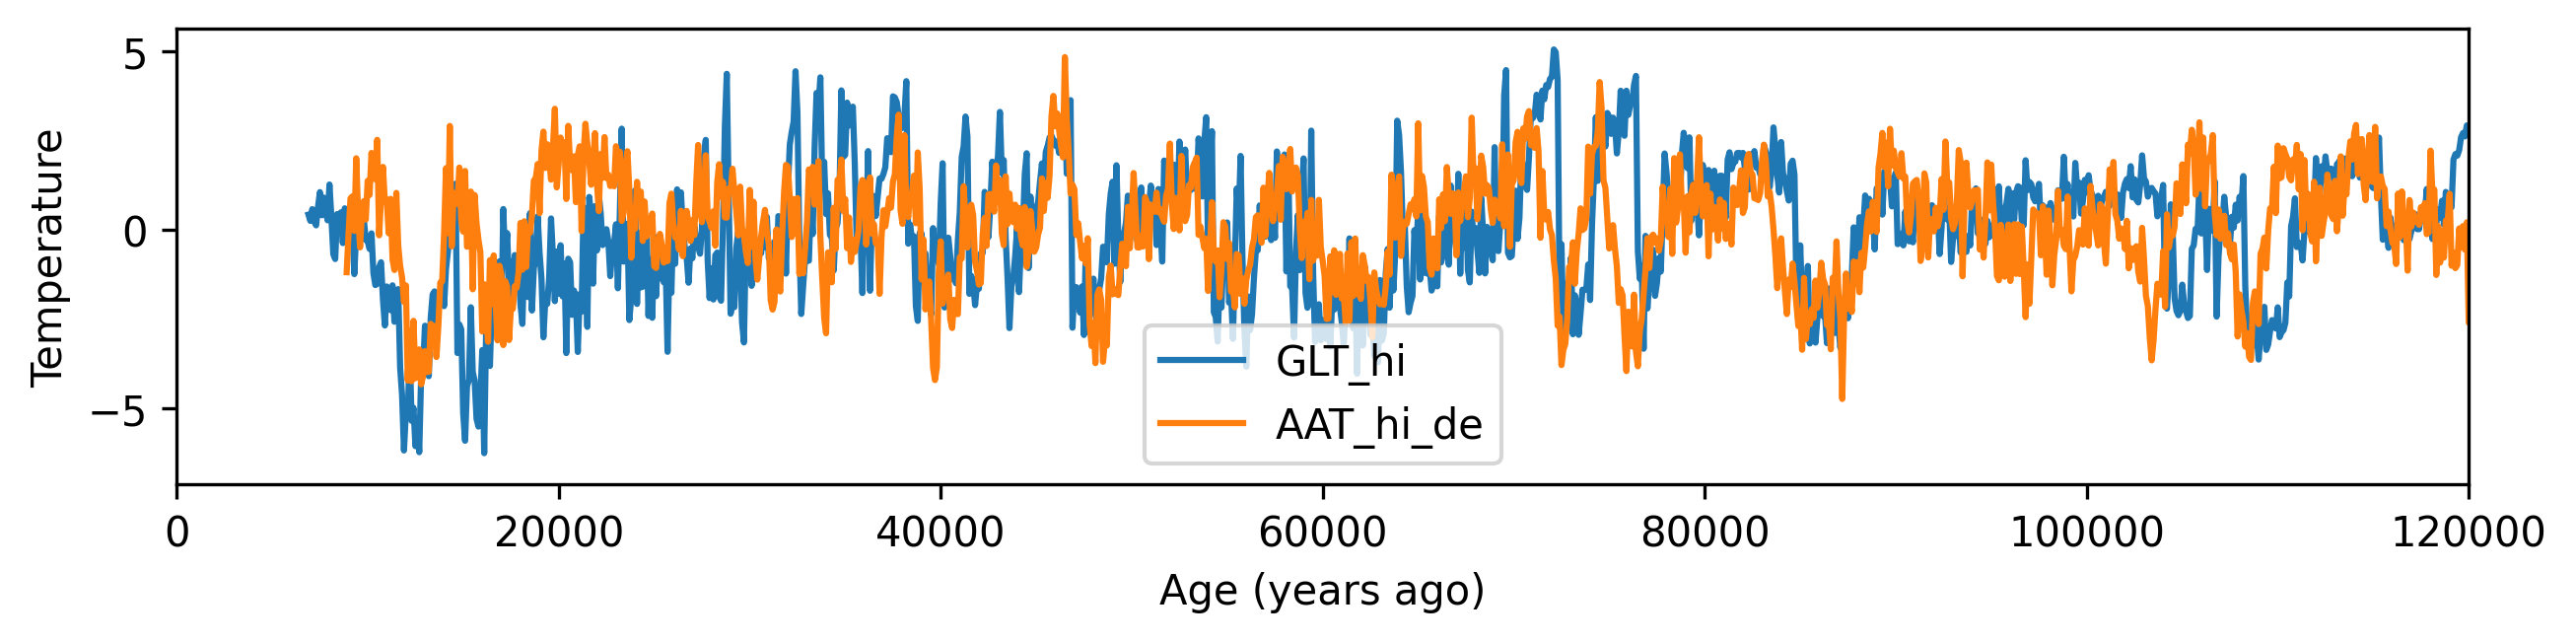

In [226]:
# plot the derivative of EDC temperature difference and the Greenland d18o difference 
fig=plt.figure(figsize=(10, 2), dpi= 300, facecolor='w', edgecolor='k')
plt.plot(df_GT_new['age'], df_GT_new['d18o_diff'], label='GLT_hi')
plt.plot(df_new['age'], df_new['temperature_diff_derivative']*22, label='AAT_hi_de')
plt.xlabel('Age (years ago)')
plt.ylabel('Temperature')
plt.legend()
# only plot the data between 0 and 120 kyr
plt.xlim(0, 120000)





In [236]:
''' 
create a new column called 'GLT_syn' equals to the derivative of the EDC temperature difference plus
the smoothed EDC temperature that 2000 years before the current time step
'''
df_new['GLT_syn'] = df_new['temperature_diff_derivative']*22 + df_new['temperature_smoothed'].shift(20)
# add a new column to store the shifted smoothed EDC temperature
df_new['temperature_smoothed_shifted'] = df_new['temperature_smoothed'].shift(20)
df_new

,age,temperature,temperature_smoothed,temperature_diff,temperature_diff_derivative,age_shifted,GLT_syn,temperature_smoothed_shifted
0,0,0.880000,NaN,NaN,NaN,2000,NaN,NaN
1,100,-0.516079,NaN,NaN,NaN,2100,NaN,NaN
2,200,0.196428,NaN,NaN,NaN,2200,NaN,NaN
3,300,0.115777,NaN,NaN,NaN,2300,NaN,NaN
4,400,-0.332781,NaN,NaN,NaN,2400,NaN,NaN
...,...,...,...,...,...,...,...,...
7996,799600,-8.883640,-7.862653,-1.020987,0.043380,801600,-5.851823,-6.806174
7997,799700,-8.887316,-7.907358,-0.979959,0.041218,801700,-5.965264,-6.872069
7998,799800,-8.890993,-7.951542,-0.939451,0.039106,801800,-6.076117,-6.936459
7999,799900,-8.894669,-7.995206,-0.899464,0.037044,801900,-6.184380,-6.999343


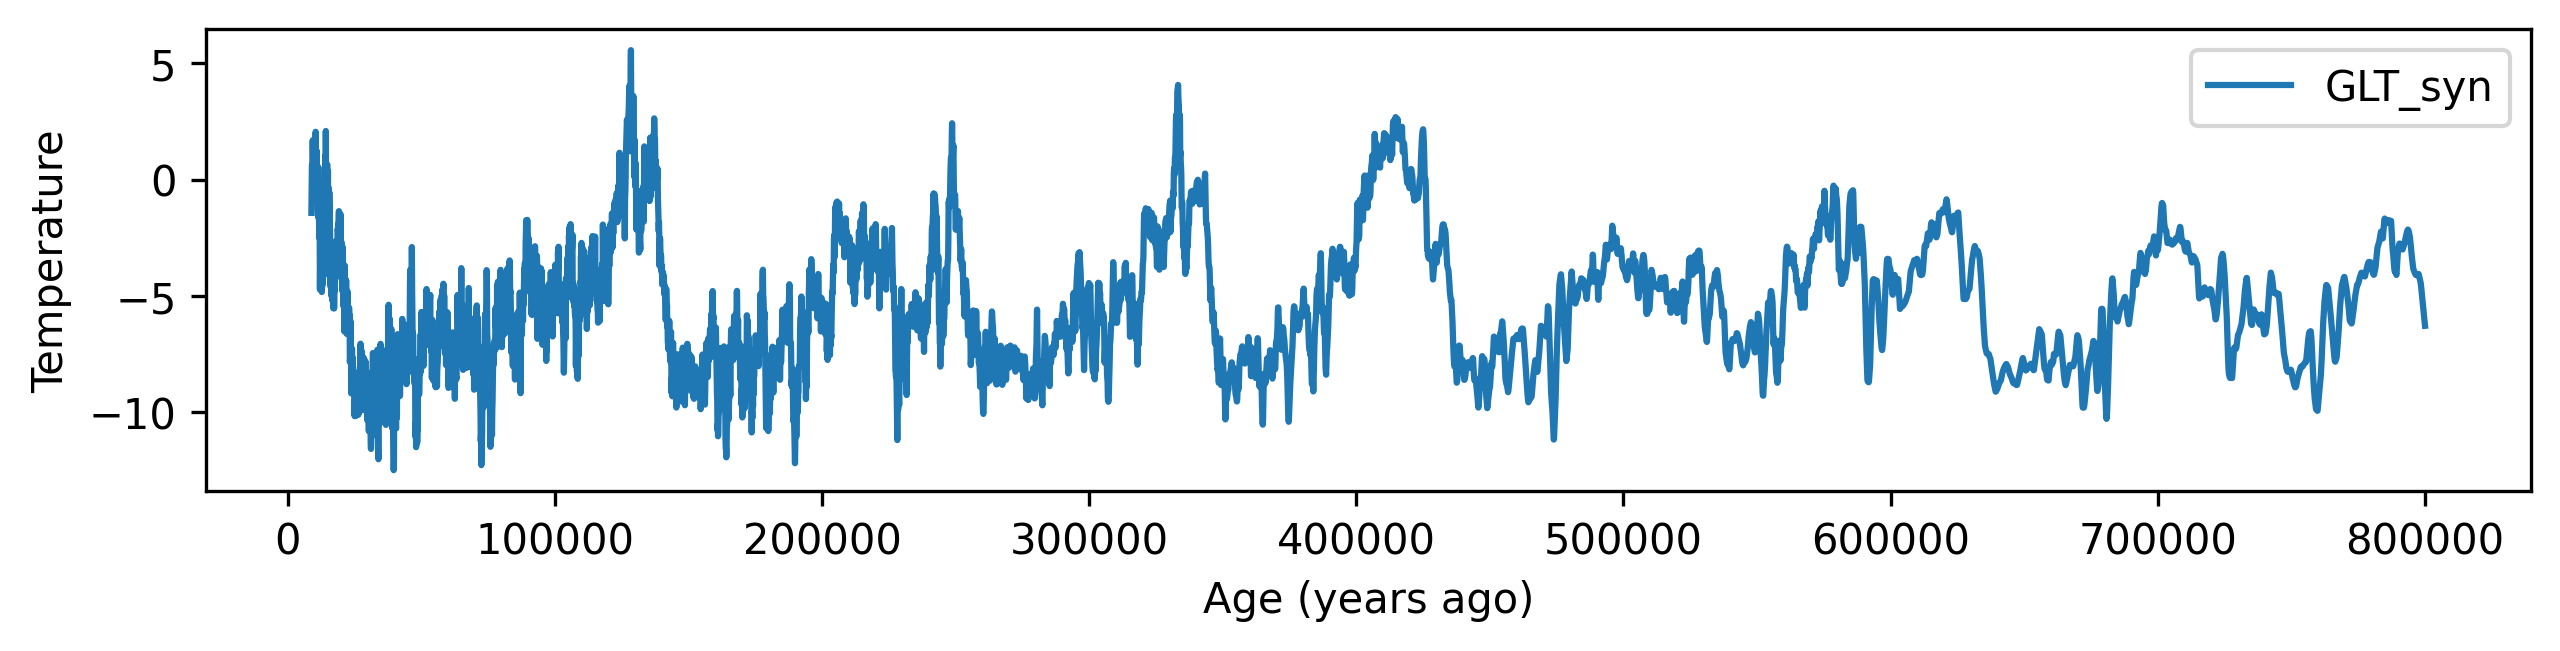

In [238]:
# plot the synthetic Greenland temperature
fig=plt.figure(figsize=(10, 2), dpi= 300, facecolor='w', edgecolor='k')
plt.plot(df_new['age'], df_new['GLT_syn'], label='GLT_syn')
#plt.plot(df_GT_new['age'], df_GT_new['d18o'], label='GLT')
plt.xlabel('Age (years ago)')
plt.ylabel('Temperature')
plt.legend()


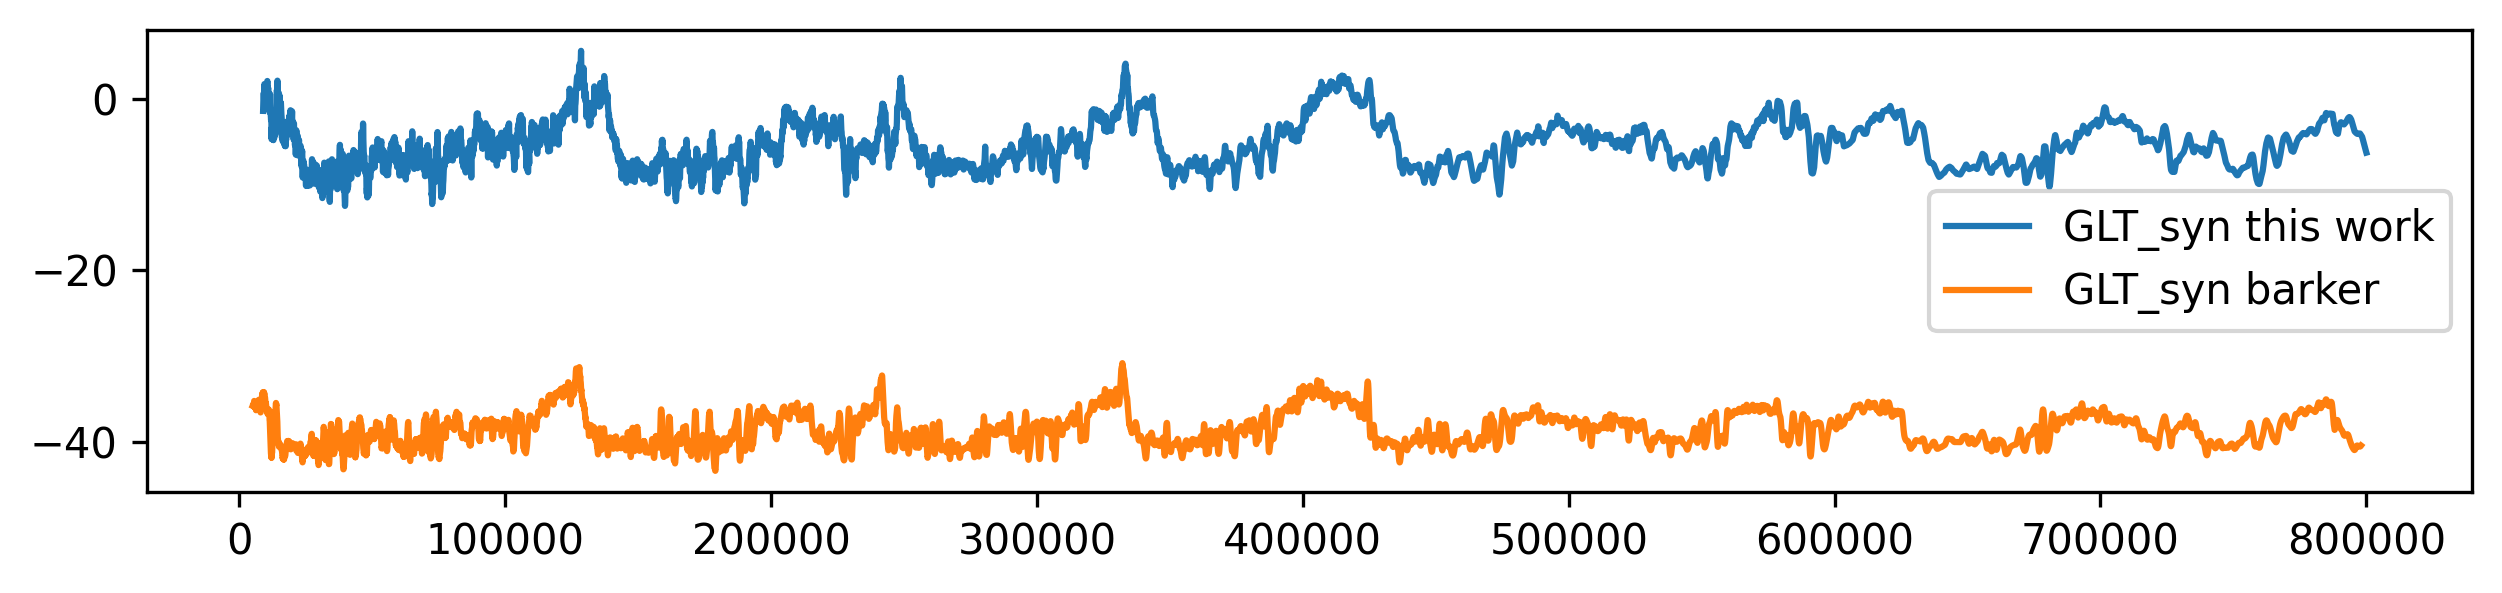

In [247]:
# compare this replicate with the data from the paper
from scipy.stats import zscore

df_barker_paper = pd.read_csv('processed_data/low_res_GT_syn_EDC_800kyr.csv')

# plot the synthetic Greenland temperature
fig=plt.figure(figsize=(10, 2), dpi= 300, facecolor='w', edgecolor='k')
plt.plot(df_new['age'], (df_new['GLT_syn']), label='GLT_syn this work')
plt.plot(df_barker_paper['age'], (df_barker_paper['temperature']), label='GLT_syn barker')
plt.legend()
plt.show()
#plt.plot(df_GT_new['age'], df_GT_new['d18o'], label='GLT')